# 一个完整的小项目

In [2]:
import pandas as pd
import os

HOUSING_PATH = './'

In [3]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path) # 函数会返回一个包含所有数据的 Pandas DataFrame 对象。

## 快速查看数据结构

In [4]:
housing = load_housing_data()
housing.head() # head()返回前5行，经度、维度、房屋年龄中位数、总房间数、总卧室数、人口数、家庭数、收入中位数、房屋价值中位数、离大海距离
# 可以看到除了最后一个离大海距离外都是数值型

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()
# 一共20640个样例，注意到总房间数只有 20433 个非空值，这意味着有 207 个街区缺少这个值。
# 所有的属性都是数值的，除了离大海距离这项。它的类型是对象，因此可以包含任意 Python 对象，
# 但是因为该项是从 CSV 文件加载的，所以必然是文本类型。在刚才查看数据前五项时，你可能注意到那一列的值是重复的，
# 意味着它可能是一项表示类别的属性。

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# 可以使用value_counts()方法查看该项中都有哪些类别，每个类别中都包含有多少个街区：
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
# describe()方法展示了数值属性的概括信息,注意忽略了空值，例如total_bedrooms只有20433个
# 25%、50%、75% 展示了对应的分位数：每个分位数指明小于这个值，例25%的实例的housing_median_age小于18，而 50% 的小于 29，75% 的小于 37
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


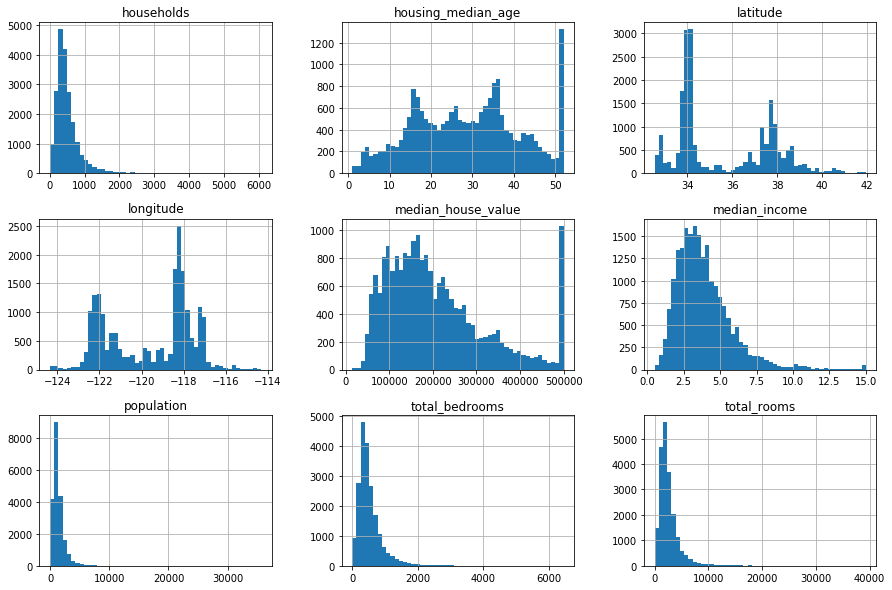

In [8]:
# 也可画柱状图直观了解数值属性的分布等信息，对完整数据集调用hist()方法会画出每个数值属性的柱状图
# 例如，可以看到略微超过 1000 个街区的median_house_value值差不多等于 500000 美元。
import matplotlib.pyplot as plt
# 有 %matplotlib inline 的话不用plt.show()也可显示图片
%matplotlib inline 
housing.hist(bins=50, figsize=(15,10))
plt.show()

## 创建测试集

In [9]:
# 划分数据集
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=99)
test_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,4128.000000,4128.000000,4128.000000,4128.000000,4073.000000,4128.000000,4128.000000,4128.000000,4128.000000
mean,-119.575809,35.652168,28.450824,2630.845446,535.149767,1433.810804,498.852955,3.868397,204648.248547
std,2.003326,2.133931,12.557501,2136.088722,414.718396,1094.653662,377.575518,1.891133,113580.974710
min,-124.300000,32.560000,1.000000,16.000000,4.000000,8.000000,3.000000,0.499900,22500.000000
25%,-121.810000,33.940000,18.000000,1439.750000,295.000000,784.000000,278.750000,2.547775,118500.000000
50%,-118.525000,34.270000,29.000000,2105.000000,427.000000,1161.500000,405.000000,3.537000,177700.000000
75%,-118.010000,37.730000,37.000000,3132.250000,643.000000,1726.250000,607.000000,4.785800,263025.000000
max,-114.560000,41.810000,52.000000,25187.000000,4585.000000,11973.000000,4176.000000,15.000100,500001.000000


## 数据探索（例如可视化），发现规律

In [10]:
# 必要时创建一个数据集副本以免损伤训练集
housing = train_set.copy()

### 地理数据可视化

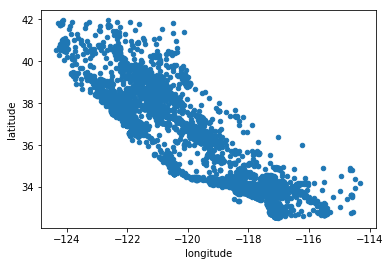

In [11]:
# 地理数据可视化，由于上文有了%matplotlib inline，所以不用plt.show()也可显示
housing.plot(kind="scatter", x="longitude", y="latitude")

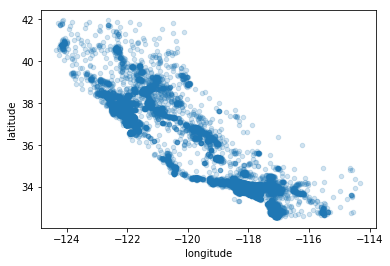

In [12]:
# 将透明度参数 alpha设为 0.2，可以更容易看出数据点的密度
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2)

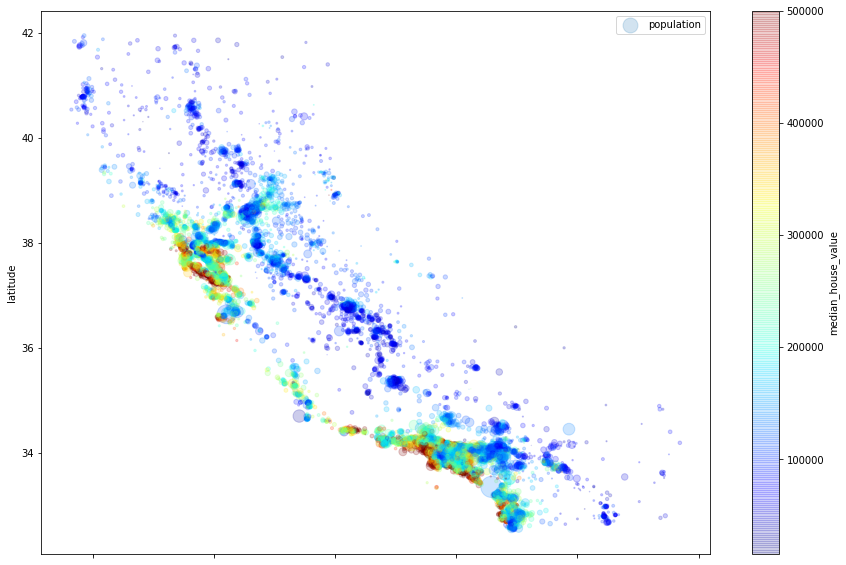

In [13]:
# 将人口和房价添加进来
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2,figsize=(15,10),
    s=housing["population"]/80, label="population",
    c="median_house_value", cmap="jet", colorbar=True,
)

### 属性间关联性

In [14]:
# 计算属性间的关联性
# 因为数据集并不是非常大，可以很容易地使用corr()方法计算出每对属性间的标准相关系数
#（standard correlation coefficient，也称作皮尔逊相关系数）
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)
# 相关系数的范围是 -1 到 1。当接近 1 时，意味强正相关， 接近-1时负相关

median_house_value    1.000000
median_income         0.686446
total_rooms           0.134780
housing_median_age    0.115423
households            0.065912
total_bedrooms        0.050775
population           -0.023943
longitude            -0.046889
latitude             -0.142539
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a984940>,
      dtype=object)

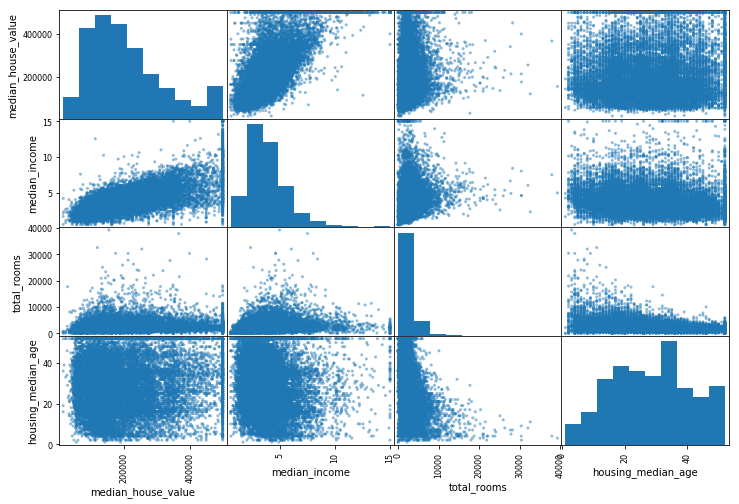

In [15]:
# 另一种检测属性间相关系数的方法是使用 Pandas 的scatter_matrix函数，它能画出每个数值属性对每个其它数值属性的图。
# 因为现在共有 11 个数值属性，你可以得到11 ** 2 = 121张图，在一页上画不下，所以只关注4个和房价中位数最有可能相关的属性
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
# 注意：16个图中，主对角线上的四个图展示的是每个属性的柱状图，而不是属性与该属性自己的相关性图（将是一条直线，无意义）

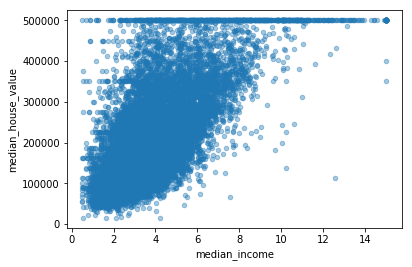

In [16]:
# 由上图看出最有希望预测房价的就是median income，单独画出来：
housing.plot(kind="scatter", x="median_income",y="median_house_value",alpha=0.4)

### 创造一些新的属性

In [17]:
# 创造一些新的属性
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

# 再来计算相关性
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)
# 与总房间数或卧室数相比，新的bedrooms_per_room属性与房价中位数的关联更强。显然，卧室数/总房间数的比例越低，房价就越高

median_house_value          1.000000
median_income               0.686446
rooms_per_household         0.145625
total_rooms                 0.134780
housing_median_age          0.115423
households                  0.065912
total_bedrooms              0.050775
population_per_household   -0.022576
population                 -0.023943
longitude                  -0.046889
latitude                   -0.142539
bedrooms_per_room          -0.255122
Name: median_house_value, dtype: float64

## 为机器学习准备数据：准备feature和label

In [18]:
# 为机器学习算法做准备数据：准备feature和label
housing = train_set.drop("median_house_value", axis=1) # 丢弃掉属性median_house_value，注意drop()创建了一份数据的备份，而不影响train_set
housing_labels = train_set["median_house_value"].copy()

### 数据清洗

In [19]:
# 数据清洗：处理缺失数据
# 由最前面的housing.info()知，total_bedrooms有一些缺失值。

# 有三个解决方案：1.去掉该样本、2.去掉该整个属性、3.给缺失值赋值，分别用DataFrame的dropna()，drop()，和fillna()方法实现
'''
housing.dropna(subset=["total_bedrooms"])        # 选项1

# housing.drop("total_bedrooms", axis=1)         # 不会改变housing，可以用housing.info()测试
housing = housing.drop("total_bedrooms", axis=1) # 选项2, 注意要用赋值的方式,否则housing不会变

median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median)         # 选项3，用中位数替换缺失值
'''

# Scikit-Learn 提供了一个方便的类来处理缺失值：Imputer
# 首先，需要创建一个Imputer实例，指定用某属性的中位数来替换该属性所有的缺失值：
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median") # 采用选项3且用中位数替换缺失值
# 因为只有数值属性才能算出中位数，我们需要创建一份不包括文本属性ocean_proximity的数据副本
housing_num = housing.drop("ocean_proximity", axis=1)

# 现在，就可以用fit()方法将imputer实例拟合到训练数据：
imputer.fit(housing_num)
# 用这个“训练过的”imputer来对训练集进行转换，将缺失值替换为中位数.
X = imputer.transform(housing_num) # 也可以fit_transform()一步到位
print(type(X), X.shape) # X 是一个包含转换后特征的普通的 Numpy 数组。如果想将其放回到 PandasDataFrame中，也很简单：
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

# imputer.fit()计算出了每个属性的中位数，并将结果保存在了实例变量statistics_中：
# print(imputer.statistics_)        # [-118.48     34.25     29.     2131.     1171.      412.        3.5488]
# print(housing_num.median().values)# [-118.48     34.25     29.     2131.     1171.      412.        3.5488]

<class 'numpy.ndarray'> (16512, 8)


### 处理类别属性

In [20]:
# ocean_proximity其实是分类属性，先将其转换成数字，再转换成one-hot编码
'''
from sklearn.preprocessing import LabelEncoder  # 转换成数字
from sklearn.preprocessing import OneHotEncoder # 再转换成one-hot编码

encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat) # <class 'numpy.ndarray'>
print(housing_cat[:8], housing_cat_encoded[:8])

cat_encoder = OneHotEncoder()
# print(housing_cat_encoded.shape) # (13209,), fit_transform()用于 2D 数组，而housing_cat_encoded是一个 1D 数组，所以需要将其变形
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))
print(type(housing_cat_1hot)) # 是一个 SciPy 稀疏矩阵，而不是 NumPy 数组,稀疏矩阵只存储非零元素的位置。当类别属性有数千个分类时，这样非常有用
# 可以像一个 2D 数据那样进行使用SciPy 稀疏矩阵，但是如果你真的想将其转变成一个（密集的）NumPy 数组，只需调用toarray()方法
housing_cat_1hot = housing_cat_1hot.toarray()
print(type(housing_cat_1hot), housing_cat_1hot)
'''

# 使用类LabelBinarizer，我们可以用一步执行上述两个转换（从文本分类到整数分类，再从整数分类到独热向量）：
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer() # encoder = LabelBinarizer(sparse_output=True)
housing_cat = housing["ocean_proximity"]
housing_cat_1hot = encoder.fit_transform(housing_cat)
# 注意默认返回的结果是一个密集 NumPy 数组。向构造器LabelBinarizer传递sparse_output=True，就可以得到一个稀疏矩阵
print(type(housing_cat_1hot), housing_cat_1hot)

<class 'numpy.ndarray'> [[0 0 0 0 1]
 [1 0 0 0 0]
 [0 1 0 0 0]
 ...
 [0 0 0 1 0]
 [0 1 0 0 0]
 [0 1 0 0 0]]


### 自定义转换器
尽管 Scikit-Learn 提供了许多有用的转换器，你还是需要自己动手写转换器执行任务，比如自定义的清理操作，或属性组合。你需要让自制的转换器与 Scikit-Learn 组件（比如流水线）无缝衔接工作，因为 Scikit-Learn 是依赖鸭子类型的（而不是继承），你所需要做的是创建一个类并执行三个方法：fit()（返回self），transform()，和fit_transform()。通过添加TransformerMixin作为基类，可以很容易地得到最后一个。另外，如果你添加BaseEstimator作为基类（且构造器中避免使用*args和**kargs），你就能得到两个额外的方法（get_params()和set_params()），二者可以方便地进行超参数自动微调。例如，一个小转换器类添加了上面讨论的属性：

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

# 在这个例子中，转换器有一个超参数add_bedrooms_per_room，默认设为True（提供一个合理的默认值很有帮助）。
# 这个超参数可以让你方便地发现添加了这个属性是否对机器学习算法有帮助。更一般地，你可以为每个不能完全确保的数据准备步骤添加一个超参数。
# 数据准备步骤越自动化，可以自动化的操作组合就越多，越容易发现更好用的组合（并能节省大量时间）。
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=True)
housing_extra_attribs = attr_adder.transform(housing.values)
print(housing_extra_attribs.shape)
print(housing_extra_attribs[0])

(16512, 12)
[-122.03 36.97 36.0 337.0 69.0 223.0 68.0 3.2404 'NEAR OCEAN'
 4.955882352941177 3.2794117647058822 0.20474777448071216]


In [22]:
# 将DataFrame转变成一个 NumPy 数组。Scikit-Learn 没有工具来处理 PandasDataFrame，因此我们需要写一个简单的自定义转换器来做这项工作：
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

### 转换流水线
数据预处理时存在许多数据转换步骤，需要按一定的顺序执行。Scikit-Learn 提供了类Pipeline来实现.

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler # 无量纲化：线性函数归一化（MinMaxScaler）或标准化（StandardScaler）
from sklearn.pipeline import FeatureUnion # 将处理数值和类别属性的流水线合并起来

# 由于版本更新的原因，直接用自带的LabelBinarizer()话会报错：
# TypeError: fit_transform() takes 2 positional arguments but 3 were given
# 所以重写一个
from sklearn.base import TransformerMixin #gives fit_transform method for free
class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=0):
        return self.encoder.transform(x)


num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('label_binarizer', MyLabelBinarizer()), # ('label_binarizer', LabelBinarizer())会报错

    ])

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

housing_prepared = full_pipeline.fit_transform(housing)
# housing开始是9个属性（10个除去median_house_value），CombinedAttributesAdder()添加了三个属性，再one-hot成5个，所以共9+3+4个属性
print(housing_prepared.shape) 
print(housing_prepared[0])

(16512, 16)
[-1.22871132  0.62872038  0.58078771 -1.04886243 -1.11260521 -1.05140229
 -1.12568879 -0.33167392 -0.18471869  0.01550852 -0.14136589  0.
  0.          0.          0.          1.        ]


## 选择并训练模型

### 在训练集上训练和评估

In [24]:
# 用线性模型训练
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

#测试一下
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("True Labels:", list(some_labels))

# 用 Scikit-Learn 的mean_squared_error函数，用全部训练集来计算下这个回归模型的 RMSE
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print("线性模型房价中位数预测RMSE：",lin_rmse)
# 显然结果并不好：大多数街区的median_housing_values位于 120000 到 265000 美元之间，因此预测误差 68666 美元不能让人满意


# 用一个更强大的模型：决策树
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
print("\n决策树模型房价中位数预测RMSE：",tree_rmse, ", 显然是过拟合了")

Predictions: [228742.7682201  252921.28847984 220089.59138887 276410.87414534
 182973.81318418]
True Labels: [225000.0, 177200.0, 248500.0, 294500.0, 165900.0]
线性模型房价中位数预测RMSE： 68666.75082706794

决策树模型房价中位数预测RMSE： 0.0 , 显然是过拟合了


### 交叉验证
评估模型的一种方法是用函数train_test_split来分割训练集，得到一个更小的训练集和一个验证集，然后用更小的训练集来训练模型，用验证集来评估。
另一种更好的方法是使用 Scikit-Learn 的交叉验证功能。下面的代码采用了 K 折交叉验证（K-fold cross-validation）：它随机地将训练集分成十个不同的子集，成为“折”，然后训练评估决策树模型 10 次，每次选一个不用的折来做评估，用其它 9 个来做训练。结果是一个包含 10 个评分的数组：

In [25]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
# Scikit-Learn 交叉验证功能期望的是效用函数（越大越好）而不是损失函数（越低越好），因此得分函数实际上与 MSE 相反（即负值）
rmse_scores = np.sqrt(-scores)
print("采用交叉验证的【决策树】模型房价中位数预测RMSE均值：",rmse_scores.mean(), "  方差：", rmse_scores.std())

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
print("采用交叉验证的【线性】模型房价中位数预测RMSE均值：",lin_rmse_scores.mean(), "  方差：", lin_rmse_scores.std())

# 集成学习 随机森林
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
print("采用交叉验证的【随机森林】模型房价中位数预测RMSE均值：",forest_rmse_scores.mean(), "  方差：", forest_rmse_scores.std())

采用交叉验证的【决策树】模型房价中位数预测RMSE均值： 71104.4060327256   方差： 2099.1007102658696
采用交叉验证的【线性】模型房价中位数预测RMSE均值： 69133.18583920141   方差： 3461.0549078488625
采用交叉验证的【随机森林】模型房价中位数预测RMSE均值： 52358.49862272832   方差： 1671.0547694419886


## 模型调参
### 网格搜索
使用 Scikit-Learn 的GridSearchCV来找到一个好的超参数组合。你所需要做的是告诉GridSearchCV要试验有哪些超参数，要试验什么值，GridSearchCV就能用交叉验证试验所有可能超参数值的组合。例如，下面的代码搜索了RandomForestRegressor超参数值的最佳组合：

In [26]:
from sklearn.model_selection import GridSearchCV

# param_grid告诉 Scikit-Learn 首先评估所有的列在第一个dict中的n_estimators和max_features的3 × 3 = 9种组合
# 然后尝试第二个dict中超参数的2 × 3 = 6种组合，这次会将超参数bootstrap设为False而不是True（后者是该超参数的默认值）
# 所以总共 15 种组合
param_grid = [
    # 当你不确定超参数该有什么值，一个简单的方法是先尝试连续的 10 的幂（1，10，100...）,然后再尝试更小的粒度
    {'n_estimators': [30, 50, 100], 'max_features': [5, 6, 7]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

# 采用效果最好的随机森林
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error') 
grid_search.fit(housing_prepared, housing_labels)
print("最佳参数组合：",grid_search.best_params_)
print("最佳的估计器：",grid_search.best_estimator_)
print("评估得分：")
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

最佳参数组合： {'max_features': 6, 'n_estimators': 100}
最佳的估计器： RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
评估得分：
50265.63343306096 {'max_features': 5, 'n_estimators': 30}
49821.97500133563 {'max_features': 5, 'n_estimators': 50}
49384.2953580885 {'max_features': 5, 'n_estimators': 100}
50054.83693393955 {'max_features': 6, 'n_estimators': 30}
49890.0216606965 {'max_features': 6, 'n_estimators': 50}
49354.87220858218 {'max_features': 6, 'n_estimators': 100}
50290.35724932197 {'max_features': 7, 'n_estimators': 30}
49836.038601808614 {'max_features': 7, 'n_estimators': 50}
49388.87240134058 {'max_features': 7, 'n_estimators': 100}
63114.53662825358 {'bootstrap': Fa

### 随机搜索
当探索相对较少的组合时，就像前面的例子，网格搜索还可以。但是当超参数的搜索空间很大时，最好使用RandomizedSearchCV。这个类的使用方法和类GridSearchCV很相似，但它不是尝试所有可能的组合，而是通过选择每个超参数的一个随机值(给定分布或list)的特定数量（n_iter）的随机组合。

In [27]:
from sklearn.model_selection import RandomizedSearchCV
import scipy

# dict中的value可以是一个分布（如scipy.stats.distributions）或者list，用于采样
param_Random = {'n_estimators': [1, 10, 50, 100], 'max_features': [5, 6, 7]} # 这里不是dict的列表而就是一个dict

# 采用效果最好的随机森林
forest_reg = RandomForestRegressor()
Random_search = RandomizedSearchCV(forest_reg, param_Random, cv=5, scoring='neg_mean_squared_error', n_iter=10) 
Random_search.fit(housing_prepared, housing_labels)
print("最佳参数组合：",Random_search.best_params_)
print("最佳的估计器：",Random_search.best_estimator_)
print("评估得分：")
cvres = Random_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

最佳参数组合： {'n_estimators': 100, 'max_features': 6}
最佳的估计器： RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
评估得分：
49799.183023408565 {'n_estimators': 50, 'max_features': 6}
49343.863351634136 {'n_estimators': 100, 'max_features': 6}
52542.289245813845 {'n_estimators': 10, 'max_features': 6}
77785.97207783788 {'n_estimators': 1, 'max_features': 5}
52431.55863445204 {'n_estimators': 10, 'max_features': 5}
50038.79082882113 {'n_estimators': 50, 'max_features': 5}
49757.039535818505 {'n_estimators': 50, 'max_features': 7}
75376.68172037022 {'n_estimators': 1, 'max_features': 7}
49358.54171300789 {'n_estimators': 100, 'max_features': 7}
49436.33626455637 {'n_estimators

### 分析最佳模型

通过分析最佳模型，常常可以获得对问题更深的了解。比如，RandomForestRegressor可以指出每个属性对于做出准确预测的相对重要性：

In [30]:
feature_importances = grid_search.best_estimator_.feature_importances_
print(feature_importances)

# 将重要性分数和属性名放到一起并排序
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances,attributes), reverse=True)
# 有了这个信息，你就可以丢弃一些不那么重要的特征（比如，显然只要一个ocean_proximity的类型（INLAND）就够了，所以可以丢弃掉其它的）

[7.25464625e-02 7.28050114e-02 4.58362845e-02 1.69598063e-02
 1.66570491e-02 1.68030070e-02 1.53390633e-02 3.47876508e-01
 5.47721440e-02 1.06638558e-01 7.00178548e-02 1.20832954e-02
 1.43253101e-01 1.86438111e-04 3.27764312e-03 4.94777351e-03]


[(0.34787650792173425, 'median_income'),
 (0.14325310051672707, 'INLAND'),
 (0.10663855840254334, 'pop_per_hhold'),
 (0.07280501137060157, 'latitude'),
 (0.07254646253876508, 'longitude'),
 (0.07001785482385196, 'bedrooms_per_room'),
 (0.054772144020811375, 'rooms_per_hhold'),
 (0.04583628453879072, 'housing_median_age'),
 (0.01695980628380964, 'total_rooms'),
 (0.016803006979537335, 'population'),
 (0.016657049117054817, 'total_bedrooms'),
 (0.015339063314461651, 'households'),
 (0.012083295432870084, '<1H OCEAN'),
 (0.004947773510045012, 'NEAR OCEAN'),
 (0.0032776431175648947, 'NEAR BAY'),
 (0.00018643811083123872, 'ISLAND')]

## 用测试集评测系统
用测试集评估最后的模型：从测试集得到预测值和标签，运行full_pipeline转换数据（调用transform()，而不是fit_transform()！），再用测试集评估最终模型：

In [32]:
final_model = grid_search.best_estimator_

X_test = test_set.drop("median_house_value", axis=1)
y_test = test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

47058.920860046324
